In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import shuffle
%matplotlib inline




In [25]:
data = pd.read_csv('data/hour.csv')
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [26]:
#def features and dropping

categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']
target_column = 'cnt'
columns_to_drop = ['instant', 'dteday', 'casual', "registered"]
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore') #drop the data that we will not use



In [27]:
#OHE

X_processed_df = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True) #OHE
Y_series = X_processed_df.pop(target_column) #extract cnt and remove it from X_processed
X_df = X_processed_df # x contains all features

#X_df = X_df.reset_index(drop=True)
#Y_series = Y_series.reset_index(drop=True) 

In [28]:
# 60-20-20 split

m = len(X_df)
train_end = int(m*0.6)
val_end = int(m*0.8)

X_train_df = X_df.iloc[:train_end]
y_train = Y_series.iloc[:train_end].values

X_val_df = X_df.iloc[train_end:val_end]
y_val = Y_series.iloc[train_end:val_end].values

X_test_df = X_df.iloc[val_end:]
y_test = Y_series.iloc[val_end:].values


#conversion to numpy arrays for using keras (as floats)

X_train_processed = X_train_df.values.astype('float32')
X_val_processed = X_val_df.values.astype('float32')
X_test_processed = X_test_df.values.astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

In [29]:
# deep learning model

input_shape = X_train_processed.shape[1] #nr features

model = Sequential(
    [
        tf.keras.Input(shape=(input_shape,)),    #specify input size
        Dense(50, activation='relu', name = "L1"), 
        Dense(25, activation='relu', name = "L2"), 
        Dense(1, activation='linear', name = "L3")
    ]
)
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ["mae"]
             )

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 50)             │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001 (15.63 KB)

 Trainable params: 4,001 (15.63 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#training 

history = model.fit(
    X_train_processed, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_data = (X_val_processed, y_val)
    #verbose = 0 #to hide data being trained
)

print("\nTraining finished (eindelijk)")

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34245.0469 - mae: 133.7070 - val_loss: 44557.4609 - val_mae: 158.0275
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11705.1475 - mae: 83.7550 - val_loss: 26428.7852 - val_mae: 121.0235
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6840.6816 - mae: 59.8026 - val_loss: 19001.5977 - val_mae: 105.5898
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5774.6138 - mae: 54.4068 - val_loss: 17490.3086 - val_mae: 103.5163
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5452.8120 - mae: 52.2888 - val_loss: 16866.2070 - val_mae: 100.2439
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5302.2861 - mae: 51.5101 - val_loss: 16211.5352 - val_mae: 96.5865
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4846.3794 - mae: 49.1789 - val_loss: 15618.1045 - val_mae: 96.5040
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4475.7578 - mae: 47.1029 - val_loss

In [43]:
#evaluation + comparing (w RMSE)

Y_pred = model.predict(X_val_processed)
rmse_nn = np.sqrt(mean_squared_error(y_val, Y_pred))
print(f"Deep Learning Model Test Set RMSE: {rmse_nn:.2f} rentals ")

print(Y_pred[:10])
print(y_val[:10])


rmse_linear_regression = 144 #other model
print("\n            Comparison")
print(f"Linear Regression RMSE: {rmse_linear_regression:.2f} rentals ")
print(f"Deep Learning RMSE:     {rmse_nn:.2f} rentals")

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Deep Learning Model Test Set RMSE: 72.16 rentals 
[[245.28545 ]
 [282.50635 ]
 [387.37115 ]
 [650.2622  ]
 [607.06067 ]
 [406.805   ]
 [257.68213 ]
 [204.8589  ]
 [165.16551 ]
 [104.971054]]
[258. 287. 426. 713. 746. 425. 330. 243. 169.  97.]

            Comparison
Linear Regression RMSE: 144.00 rentals 
Deep Learning RMSE:     72.16 rentals


In [49]:
import numpy as np

def compute_rrse(Y_pred, Y_val):
    """
    Computes the Relative Root Squared Error (RRSE).
    RRSE is the RMSE divided by the RMSE of the simplest possible model (predicting the mean).
    It is expressed as a percentage.
    """
    if Y_pred.ndim > 1 and Y_pred.shape[1] == 1:
        Y_pred = Y_pred.flatten()  #nessecary for this function, Y_pred was array of arrays, and needs to be 1D array
        
    # Check if shapes match after flattening
    if Y_pred.shape != Y_val.shape:
        # Fallback for unexpected shapes
        return np.nan
        
    # 1. Calculate the mean of the actual values (a_bar)
    a_bar = np.mean(Y_val)
    
    # 2. Calculate the Numerator: Sum of Squared Errors of the Model (SSE_model)
    # SSE_model = Sum((p_i - a_i)^2)
    squared_error_model = (Y_pred - Y_val)**2
    sse_model = np.sum(squared_error_model)
    
    # 3. Calculate the Denominator: Sum of Squared Errors of the Mean Model (SSE_mean)
    # SSE_mean = Sum((a_bar - a_i)^2)
    squared_error_mean = (a_bar - Y_val)**2
    sse_mean = np.sum(squared_error_mean)
    
    # 4. Compute RRSE 
    if sse_mean == 0:
        # Avoid division by zero
        return 0.0
        
    rrse_ratio = sse_model / sse_mean
    # RRSE is the square root of the ratio, multiplied by 100 for a percentage
    rrse = np.sqrt(rrse_ratio) * 100
    
    return rrse


print("RRSE: " + str(compute_rrse(Y_pred, y_val)))

RRSE: 33.48602


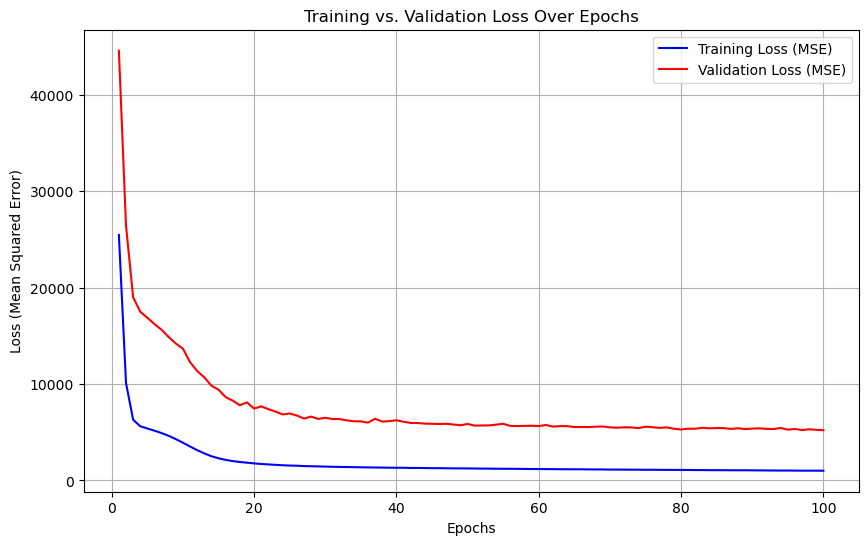

In [45]:
import matplotlib.pyplot as plt

# The 'history' object is returned by model.fit() and contains the loss values.
# Assuming you have run your model training cell and the result is stored in 
# a variable named 'history'.

# Extract loss data
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss (MSE)')
plt.plot(epochs, val_loss, 'r', label='Validation Loss (MSE)')
plt.title('Training vs. Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()



---------------------
Both lines decrease togheter and stabalize so our model is generalizing well -> no under- or overfitting

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.2f} (Lower is better)")
    print(f"MAE:  {mae:.2f} (Lower is better)")
    print(f"R^2:  {r2:.4f} (Higher is better, max 1.0)")
    print("------------")

evaluate_model(y_val, Y_pred, "Neural Network")



--- Neural Network Performance ---
RMSE: 72.16 (Lower is better)
MAE:  51.18 (Lower is better)
R^2:  0.8879 (Higher is better, max 1.0)
------------------------------
